In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd')

In [18]:

def LR_cost_function (alpha, beta, x, y):
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i]-(alpha+beta*x[i]))**2
        error += point_error
    return error/n
        
def step (alpha_cur, beta_cur, learning_rate, x, y):
    alpha=0
    beta=0
    n = len(x)
    for i in range(n):
        #pder of intercept
        point_alpha = -(2/n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        point_beta = -(2/n)*x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate *alpha
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]
        

In [19]:
stop = 1000
learning_rate = .005

alpha_start = 0
beta_start = 0

x = np.random.normal(0,1,100)
y = x * 2 + np.random.sample(100)

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1),y.reshape(-1,1))

print('\nCoefficients from sklearn: \n', regr.coef_)
print('\nIntercept from sklearn: \n', regr.intercept_)


Coefficients from sklearn: 
 [[1.98337455]]

Intercept from sklearn: 
 [0.51044899]



Coefficients from gradient descent algorithm: 
 1.9832329448345316

Intercept from gradient descent algorithm: 
 0.5104283708928498


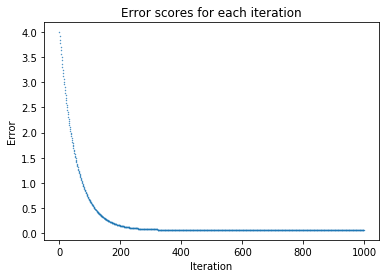

In [20]:
# Now fit an iteratively optimized regression using your custom gradient
# descent algorithm.
#sotring each iteration to inspect later
all_error=[]

#provide starting values
alpha = alpha_start
beta = beta_start

for iter in range(stop):
    alpha, beta = step(alpha, beta, learning_rate,x,y)
    
    error = LR_cost_function(alpha,beta,x,y)
    
    all_error.append(error)
    
    
print('\nCoefficients from gradient descent algorithm: \n', beta)
print('\nIntercept from gradient descent algorithm: \n', alpha)

plt.plot(all_error, 'o', ms=.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error scores for each iteration')
plt.show()
    
